# Dive Prediction - Results

*Predicting Seabird Diving Behaviour from GPS data*

This notebook presents results of different algorithms for dive prediction based on a dataset of **74 foraging trips of seabirds** (*Sula Variegata*) with both GPS and Time Depth Recorder (TDR) tracking data. Data has been collected on **Ilha Pescadores, Peru** between 2009 and 2013.


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
def roc(data, opt = ''):
    # globally
    TP = []
    FP = []
    
    if opt == 'all':
        scale = data.prediction.sort_values().unique()
    else:
        scale = np.arange(0,1,0.001)
        
    for tt in scale:
        all_estim = 1* (data.prediction > tt)
        true_positive = np.mean(all_estim[data.dive == 1])
        true_negative = 1-np.mean(all_estim[data.dive == 0])
        TP.append(true_positive)
        FP.append(1-true_negative)
        
    return (np.array(FP), np.array(TP))

In [3]:
def outsampling(data, resolution):

    data_output = pd.DataFrame()
    for i in data.trip.unique():
        t = data[data.trip == i].copy()

        idx = [i%resolution == 0 for i in range(len(t))]

        traj = t.loc[idx, ('trip', 'datetime', 'lon', 'lat')]

        traj['dive'] = [np.max(t.dive[i:i+resolution]) for i in range(len(t)) if i%resolution==0]
        traj['prediction'] = [np.max(t.prediction[i:i+resolution]) for i in range(len(t)) if i%resolution==0]

        data_output = data_output.append(traj, ignore_index=True)

    return data_output

In [4]:
dicolour = { 'blue':   '#1f77b4',  # muted blue
             'orange': '#ff7f0e',  # safety orange
             'green':  '#2ca02c',  # cooked asparagus green
             'red':    '#d62728',  # brick red
             'purple': '#9467bd',  # muted purple
             'brown':  '#8c564b',  # chestnut brown
             'pink':   '#e377c2',  # raspberry     yogurt pink
             'gray':   '#7f7f7f',  # middle gray
             'yellow': '#bcbd22'   # curry yellow-green
           }

# Figure 1

In [5]:
LB_ftp_5s = pd.read_csv('./../results/LB_ftp_5s.csv')
LB_ftp_15s = pd.read_csv('./../results/LB_ftp_15s.csv')
LB_ftp_30s = pd.read_csv('./../results/LB_ftp_30s.csv')

LB_hmm_5s = pd.read_csv('./../results/LB_hmm_5s.csv')
LB_hmm_15s = pd.read_csv('./../results/LB_hmm_15s.csv')
LB_hmm_30s = pd.read_csv('./../results/LB_hmm_30s.csv')

LB_fcn_5s = pd.read_csv('./../results/LB_fcn_lonlatcov_5s.csv')
LB_fcn_15s = pd.read_csv('./../results/LB_fcn_lonlatcov_15s.csv')
LB_fcn_30s = pd.read_csv('./../results/LB_fcn_lonlatcov_30s.csv')

LB_unet_5s = pd.read_csv('./../results/LB_unet_matrixlonlatcov_5s.csv')
LB_unet_15s = pd.read_csv('./../results/LB_unet_matrixlonlatcov_15s.csv')
LB_unet_30s = pd.read_csv('./../results/LB_unet_matrixlonlatcov_30s.csv')

SV_ftp_5s = pd.read_csv('./../results/SV_ftp_5s.csv')
SV_ftp_15s = pd.read_csv('./../results/SV_ftp_15s.csv')
SV_ftp_30s = pd.read_csv('./../results/SV_ftp_30s.csv')

SV_hmm_5s = pd.read_csv('./../results/SV_hmm_5s.csv')
SV_hmm_15s = pd.read_csv('./../results/SV_hmm_15s.csv')
SV_hmm_30s = pd.read_csv('./../results/SV_hmm_30s.csv')

SV_fcn_5s = pd.read_csv('./../results/SV_fcn_lonlatcov_5s.csv')
SV_fcn_15s = pd.read_csv('./../results/SV_fcn_lonlatcov_15s.csv')
SV_fcn_30s = pd.read_csv('./../results/SV_fcn_lonlatcov_30s.csv')

SV_unet_5s = pd.read_csv('./../results/SV_unet_matrixlonlatcov_5s.csv')
SV_unet_15s = pd.read_csv('./../results/SV_unet_matrixlonlatcov_15s.csv')
SV_unet_30s = pd.read_csv('./../results/SV_unet_matrixlonlatcov_30s.csv')


LB_ftp_5s_roc = roc(LB_ftp_5s)
LB_ftp_15s_roc = roc(LB_ftp_15s)
LB_ftp_30s_roc = roc(LB_ftp_30s)

LB_hmm_5s_roc = roc(LB_hmm_5s, opt = 'all')
LB_hmm_15s_roc = roc(LB_hmm_15s, opt = 'all')
LB_hmm_30s_roc = roc(LB_hmm_30s, opt = 'all')

LB_fcn_5s_roc = roc(LB_fcn_5s)
LB_fcn_15s_roc = roc(LB_fcn_15s)
LB_fcn_30s_roc = roc(LB_fcn_30s)

LB_unet_5s_roc = roc(LB_unet_5s)
LB_unet_15s_roc = roc(LB_unet_15s)
LB_unet_30s_roc = roc(LB_unet_30s)

SV_ftp_5s_roc = roc(SV_ftp_5s)
SV_ftp_15s_roc = roc(SV_ftp_15s)
SV_ftp_30s_roc = roc(SV_ftp_30s)

SV_hmm_5s_roc = roc(SV_hmm_5s, opt = 'all')
SV_hmm_15s_roc = roc(SV_hmm_15s, opt = 'all')
SV_hmm_30s_roc = roc(SV_hmm_30s, opt = 'all')

SV_fcn_5s_roc = roc(SV_fcn_5s)
SV_fcn_15s_roc = roc(SV_fcn_15s)
SV_fcn_30s_roc = roc(SV_fcn_30s)

SV_unet_5s_roc = roc(SV_unet_5s)
SV_unet_15s_roc = roc(SV_unet_15s)
SV_unet_30s_roc = roc(SV_unet_30s)

In [6]:
(FP, TP) = SV_hmm_5s_roc
-np.trapz(TP, FP)

0.8777674442936403

In [7]:
def loss(data, weight):
    n = len(data)
    x = data.prediction/1.00001
    y = weight * data.dive * np.log(x) + (1-data.dive) * np.log(1 - x)
    return - 1/n * sum(y)

In [8]:
loss(SV_unet_5s, 30)

0.31087910025546817

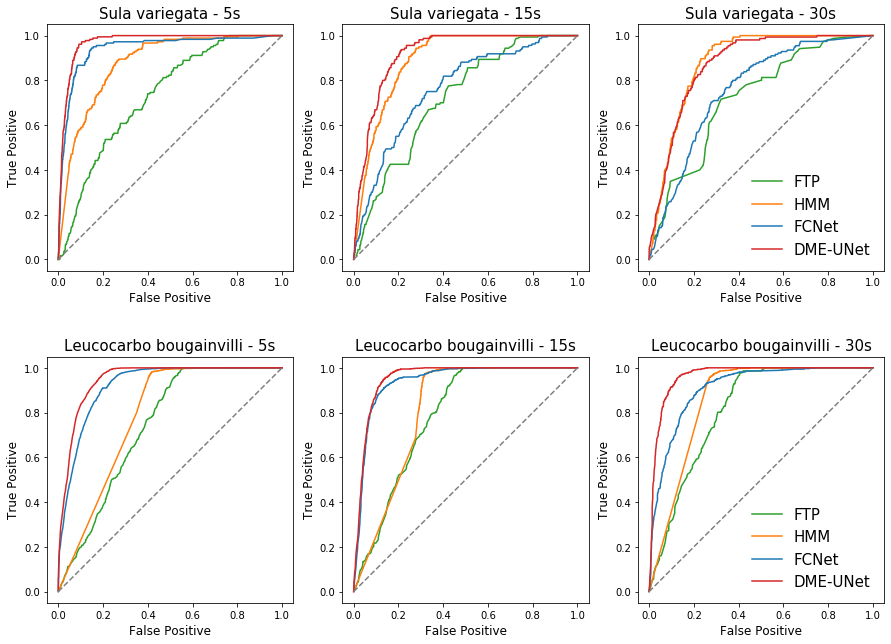

In [9]:
fig, ax = plt.subplots(2,3, figsize=(15,11))
plt.subplots_adjust(hspace=0.25)

# plt.subplot(2,2,1, aspect = 'equal')
ax[0,0].plot(SV_ftp_5s_roc[0], SV_ftp_5s_roc[1], label = 'FTP', c = dicolour['green'])
ax[0,0].plot(SV_hmm_5s_roc[0], SV_hmm_5s_roc[1], label = 'HMM', c = dicolour['orange'])
ax[0,0].plot(SV_fcn_5s_roc[0], SV_fcn_5s_roc[1], label = 'FCNet', c = dicolour['blue'])
ax[0,0].plot(SV_unet_5s_roc[0], SV_unet_5s_roc[1], label = 'DME-UNet', c = dicolour['red'])
ax[0,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,0].set_title('Sula variegata - 5s',fontsize= 15)
# ax[0,0].legend()

# plt.subplot(2,2,2, aspect = 'equal')
ax[1,0].plot(LB_ftp_5s_roc[0], LB_ftp_5s_roc[1], label = 'FTP', c = dicolour['green'])
ax[1,0].plot(LB_hmm_5s_roc[0], LB_hmm_5s_roc[1], label = 'HMM', c = dicolour['orange'])
ax[1,0].plot(LB_fcn_5s_roc[0], LB_fcn_5s_roc[1], label = 'FCNet', c = dicolour['blue'])
ax[1,0].plot(LB_unet_5s_roc[0], LB_unet_5s_roc[1], label = 'DME-UNet', c = dicolour['red'])
ax[1,0].set_title('Leucocarbo bougainvilli - 5s',fontsize= 15)
ax[1,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
# ax[0,1].legend()

# plt.subplot(2,2,3, aspect = 'equal')
ax[0,1].plot(SV_ftp_15s_roc[0], SV_ftp_15s_roc[1], label = 'FTP', c = dicolour['green'])
ax[0,1].plot(SV_hmm_15s_roc[0], SV_hmm_15s_roc[1], label = 'HMM', c = dicolour['orange'])
ax[0,1].plot(SV_fcn_15s_roc[0], SV_fcn_15s_roc[1], label = 'FCNet', c = dicolour['blue'])
ax[0,1].plot(SV_unet_15s_roc[0], SV_unet_15s_roc[1], label = 'DME-UNet', c = dicolour['red'])
ax[0,1].set_title('Sula variegata - 15s',fontsize= 15)
ax[0,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
# plt.legend()

# plt.subplot(2,2,4, aspect = 'equal')
ax[1,1].plot(LB_ftp_15s_roc[0], LB_ftp_15s_roc[1], label = 'FTP', c = dicolour['green'])
ax[1,1].plot(LB_hmm_15s_roc[0], LB_hmm_15s_roc[1], label = 'HMM', c = dicolour['orange'])
ax[1,1].plot(LB_fcn_15s_roc[0], LB_fcn_15s_roc[1], label = 'FCNet', c = dicolour['blue'])
ax[1,1].plot(LB_unet_15s_roc[0], LB_unet_15s_roc[1], label = 'DME-UNet', c = dicolour['red'])
ax[1,1].set_title('Leucocarbo bougainvilli - 15s',fontsize= 15)
ax[1,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
# ax[1,1].legend(fontsize = 15, frameon=False)

# plt.subplot(2,2,3, aspect = 'equal')
ax[0,2].plot(SV_ftp_30s_roc[0], SV_ftp_30s_roc[1], label = 'FTP', c = dicolour['green'])
ax[0,2].plot(SV_hmm_30s_roc[0], SV_hmm_30s_roc[1], label = 'HMM', c = dicolour['orange'])
ax[0,2].plot(SV_fcn_30s_roc[0], SV_fcn_30s_roc[1], label = 'FCNet', c = dicolour['blue'])
ax[0,2].plot(SV_unet_30s_roc[0], SV_unet_30s_roc[1], label = 'DME-UNet', c = dicolour['red'])
ax[0,2].set_title('Sula variegata - 30s',fontsize= 15)
ax[0,2].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,2].legend(fontsize = 15, frameon=False)

# plt.subplot(2,2,4, aspect = 'equal')
ax[1,2].plot(LB_ftp_30s_roc[0], LB_ftp_30s_roc[1], label = 'FTP', c = dicolour['green'])
ax[1,2].plot(LB_hmm_30s_roc[0], LB_hmm_30s_roc[1], label = 'HMM', c = dicolour['orange'])
ax[1,2].plot(LB_fcn_30s_roc[0], LB_fcn_30s_roc[1], label = 'FCNet', c = dicolour['blue'])
ax[1,2].plot(LB_unet_30s_roc[0], LB_unet_30s_roc[1], label = 'DME-UNet', c = dicolour['red'])
ax[1,2].set_title('Leucocarbo bougainvilli - 30s',fontsize= 15)
ax[1,2].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[1,2].legend(fontsize = 15, frameon=False)

for a in ax.flat:
    a.set_xlabel('False Positive', fontsize= 12)
    a.set_ylabel('True Positive', fontsize= 12)
    
    a.set_aspect('equal')

# Figure 2

In [10]:
hmm_lonlat = pd.read_csv('./../results/SV_hmm_lonlat_5s.csv')
hmm_lonlatcov = pd.read_csv('./../results/SV_hmm_5s.csv')


fcn_lonlat = pd.read_csv('./../results/SV_fcn_lonlat_5s.csv')
fcn_lonlatcov = pd.read_csv('./../results/SV_fcn_lonlatcov_5s.csv')

unet_lonlat = pd.read_csv('./../results/SV_unet_lonlat_5s.csv')
unet_lonlatcov = pd.read_csv('./../results/SV_unet_lonlatcov_5s.csv')
unet_matrix = pd.read_csv('./../results/SV_unet_matrix_5s.csv')
unet_matrixlonlat = pd.read_csv('./../results/SV_unet_matrixlonlat_5s.csv')
unet_matrixcov = pd.read_csv('./../results/SV_unet_matrixlonlatcov_5s.csv')


hmm_lonlat_roc = roc(hmm_lonlat, opt='all')
hmm_lonlatcov_roc = roc(hmm_lonlatcov, opt='all')

fcn_lonlat_roc = roc(fcn_lonlat)
fcn_lonlatcov_roc = roc(fcn_lonlatcov)

unet_lonlat_roc = roc(unet_lonlat)
unet_lonlatcov_roc = roc(unet_lonlatcov)
unet_matrix_roc = roc(unet_matrix)
unet_matrixlonlat_roc = roc(unet_matrixlonlat)
unet_matrixcov_roc = roc(unet_matrixcov)


In [11]:
(FP, TP) = unet_matrix_roc
-np.trapz(TP, FP)

0.8709762027022223

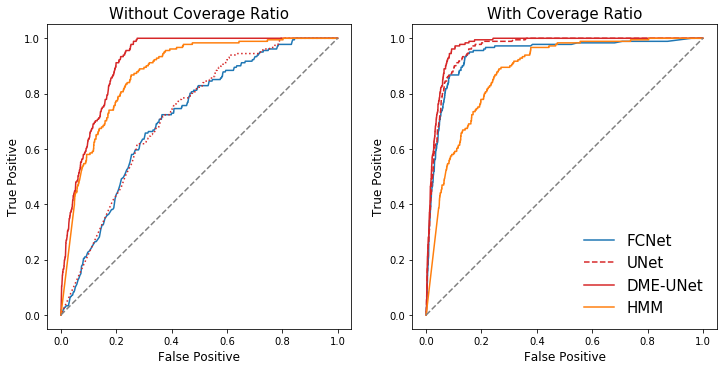

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,12))
plt.subplots_adjust(hspace=0.25)

# plt.subplot(2,2,1, aspect = 'equal')
ax[0].plot(fcn_lonlat_roc[0], fcn_lonlat_roc[1], label = 'FCNet', c = dicolour['blue'])
ax[0].plot(unet_lonlat_roc[0], unet_lonlat_roc[1], label = 'UNet', c = dicolour['red'], linestyle = ':')
ax[0].plot(unet_matrixlonlat_roc[0], unet_matrixlonlat_roc[1], label = 'DME-UNet', c = dicolour['red'])
ax[0].plot(hmm_lonlat_roc[0], hmm_lonlat_roc[1], label = 'HMM', c = dicolour['orange'])
ax[0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0].set_title('Without Coverage Ratio',fontsize= 15)
ax[0].set_xlabel('False Positive', fontsize= 12)
ax[0].set_ylabel('True Positive', fontsize= 12)
ax[0].set_aspect('equal')
# ax[0].legend()

# plt.subplot(2,2,2, aspect = 'equal')
ax[1].plot(fcn_lonlatcov_roc[0], fcn_lonlatcov_roc[1], label = 'FCNet', c = dicolour['blue'])
ax[1].plot(unet_lonlatcov_roc[0], unet_lonlatcov_roc[1], label = 'UNet', c = dicolour['red'], linestyle = '--')
ax[1].plot(unet_matrixcov_roc[0], unet_matrixcov_roc[1], label = 'DME-UNet', c = dicolour['red'])
ax[1].plot(hmm_lonlatcov_roc[0], hmm_lonlatcov_roc[1], label = 'HMM', c = dicolour['orange'])
ax[1].set_title('With Coverage Ratio',fontsize= 15)
ax[1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[1].set_xlabel('False Positive', fontsize= 12)
ax[1].set_ylabel('True Positive', fontsize= 12)
ax[1].set_aspect('equal')
ax[1].legend()
ax[1].legend(fontsize = 15, frameon=False)

# ax[1,0].plot(np.arange(1,len(fcn_lonlat_LOSS)+1)*512*16/72638, fcn_lonlat_LOSS.step_loss_validation)
# ax[1,0].plot(np.arange(1,len(unet_lonlat_LOSS)+1)*512*16/72638, unet_lonlat_LOSS.step_loss_validation)
# ax[1,0].plot(np.arange(1,len(unet_matrix_LOSS)+1)*512*16/72638, unet_matrix_LOSS.step_loss_validation)
# ax[1,0].set_xlabel('Epochs', fontsize= 12)
# ax[1,0].set_ylabel('Validation Loss', fontsize= 12)
# ax[1,0].set_xlim([0, 2.5])

# ax[1,1].plot(np.arange(1,len(fcn_lonlatcov_LOSS)+1)*512*16/72638, fcn_lonlatcov_LOSS.step_loss_validation)
# ax[1,1].plot(np.arange(1,len(unet_lonlatcov_LOSS)+1)*512*16/72638, unet_lonlatcov_LOSS.step_loss_validation)
# ax[1,1].plot(np.arange(1,len(unet_matrixcov_LOSS)+1)*512*16/72638, unet_matrixcov_LOSS.step_loss_validation)
# ax[1,1].set_xlabel('Epochs', fontsize= 12)
# ax[1,1].set_ylabel('Validation Loss', fontsize= 12)
# ax[1,1].set_xlim([0, 2.5])


# Figure 3
## maps

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname="../font/Font Awesome 5 Free-Solid-900.otf")

In [14]:
def grid_bathy(bathy_file):
    data = Dataset(bathy_file)
    lat = data.variables['lat'][:]
    lon = data.variables['lon'][:]
    lon, lat = np.meshgrid(lon, lat)
    bathy = data.variables['elevation'][:]
    return lon, lat, bathy

def my_map(lon, lat, prediction, dive, bathy_file):
    
    long_min, long_max = np.min(lon) - 0.1, np.max(lon) + 0.1
    lat_min, lat_max = np.min(lat)  - 0.1, np.max(lat) + 0.1

    # create map using BASEMAP
    m = Basemap(llcrnrlon=long_min,
                llcrnrlat=lat_min,
                urcrnrlon=long_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(long_max-long_min)/2,
                projection='merc',
                resolution = 'h',
                area_thresh=10000.,
                )
    # for legend
    m.scatter(-10, -10, marker = 'o', s = 150*0.05, alpha= 1, label = '0.05', c='#1f77b4')
    m.scatter(-10, -10, marker = 'o', s = 150*0.25, alpha= 1, label = '0.25', c='#1f77b4')
    m.scatter(-10, -10, marker = 'o', s = 150*0.5, alpha= 1, label = '0.50', c='#1f77b4')
    m.scatter(-10, -10, marker = 'o', s = 150*0.75, alpha= 1, label = '0.75', c='#1f77b4')
    m.scatter(-10, -10, marker = 'o', s = 150*0.95, alpha= 1, label = '0.95', c='#1f77b4')

    m.drawcoastlines()
    m.drawmapboundary(fill_color='#CEECF5')
    m.fillcontinents(color = '#A4A4A4',lake_color='#CEECF5')


    parallels = np.arange(-15,-5,0.2)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels, labels = [True, False, False, False])
    meridians = np.arange(-80,-75,0.2)
    m.drawmeridians(meridians, labels = [False, False, False, True])

    #bathy
    xx, yy, bathy = grid_bathy(bathy_file)
    m.pcolormesh(xx, yy, bathy, latlon = True, cmap='Greys_r', vmin = -700, vmax=100)
#     m.pcolormesh(xx, yy, bathy, latlon = True, cmap='Blues_r', vmin = -500, vmax=100)


    x, y = m(lon.values, lat.values)
    dx, dy = m(lon.values[dive == 1], lat.values[dive == 1])
    m.scatter(x, y, marker = 'o', s = 150*prediction, alpha= 1, color = dicolour['blue'])
    
    m.scatter(x, y, marker = 'o', s = 0.1, color = 'black', alpha= 0.3)
    m.scatter(dx, dy, marker = 'o', color=dicolour['red'], alpha = 0.8, s = 10, label = 'True Dives')

    
    return m
    

Text(0.5, 1.0, 'FTP')

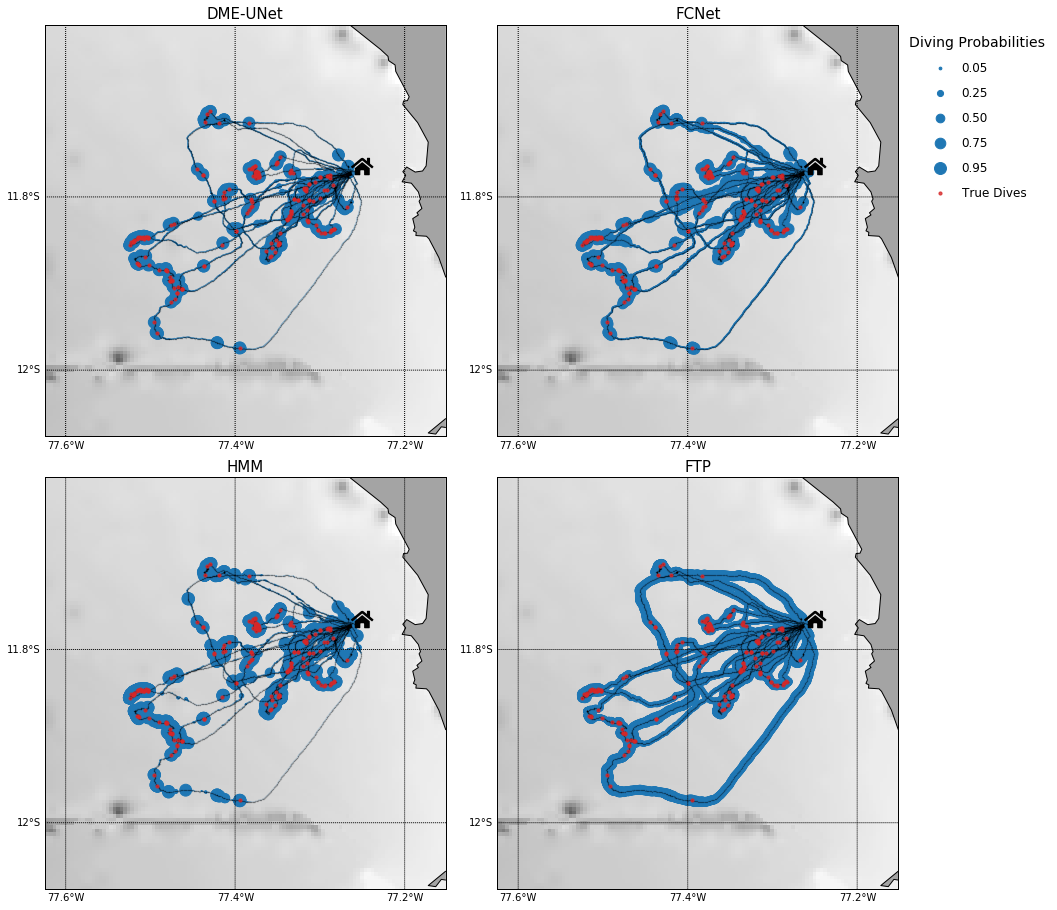

In [70]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.1) 

plt.subplot(2,2, 1)
m = my_map(SV_unet_5s.lon, SV_unet_5s.lat, SV_unet_5s.prediction, SV_unet_5s.dive,
           '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')
plt.annotate("\uf015", xy=m(-77.264, -11.773), fontproperties=fp, fontsize = 20)
plt.title('DME-UNet',fontsize= 15)


plt.subplot(2,2, 2)
m = my_map(SV_fcn_5s.lon, SV_fcn_5s.lat, SV_fcn_5s.prediction, SV_fcn_5s.dive,
           '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')
plt.annotate("\uf015", xy=m(-77.264, -11.773), fontproperties=fp, fontsize = 20)
plt.title('FCNet',fontsize= 15)
plt.legend(bbox_to_anchor=(1,1),
           scatterpoints=1, labelspacing=1, title='Diving Probabilities', 
           fontsize=12, title_fontsize=14, frameon=False)

plt.subplot(2,2, 3)
m = my_map(SV_hmm_5s.x, SV_hmm_5s.y, SV_hmm_5s.prediction, SV_hmm_5s.dive,
           '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')
plt.annotate("\uf015", xy=m(-77.264, -11.773), fontproperties=fp, fontsize = 20)
plt.title('HMM',fontsize= 15)

plt.subplot(2,2, 4)
m = my_map(SV_ftp_5s.lon, SV_ftp_5s.lat, SV_ftp_5s.prediction, SV_ftp_5s.dive,
           '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')
plt.annotate("\uf015", xy=m(-77.264, -11.773), fontproperties=fp, fontsize = 20)
plt.title('FTP',fontsize= 15)


Text(0.5, 1.0, 'FTP')

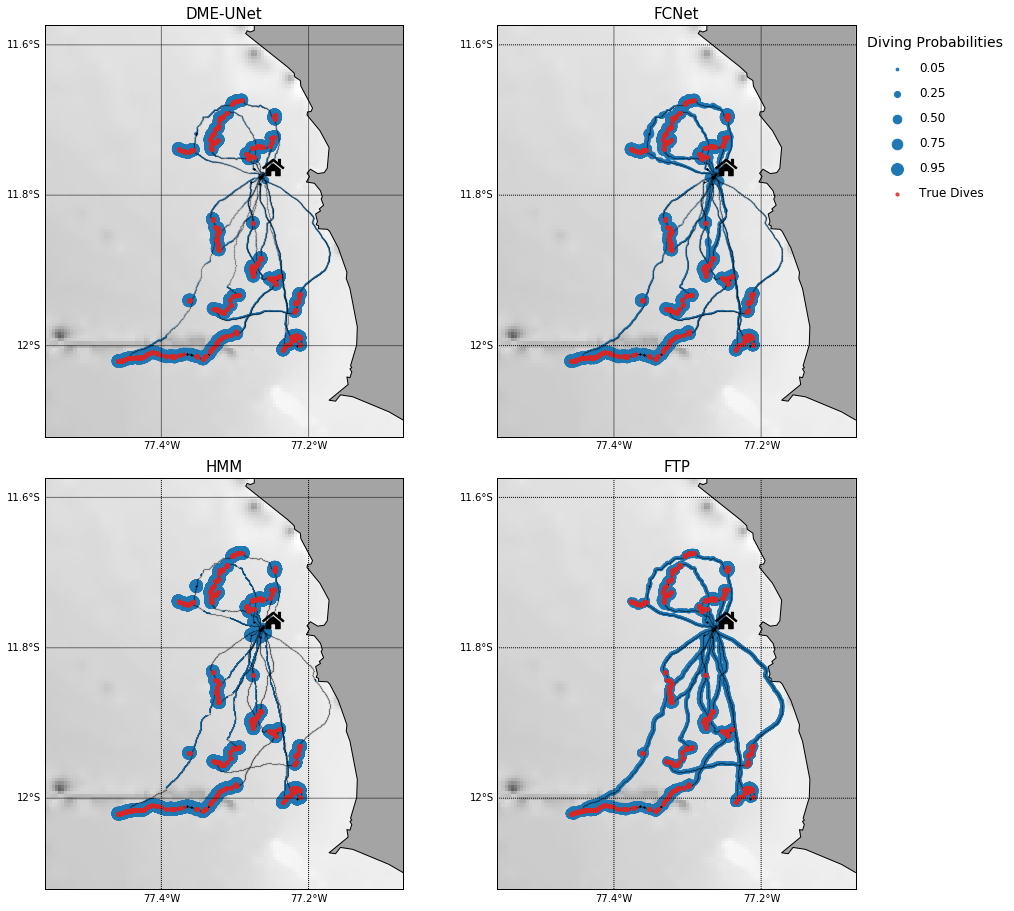

In [71]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.1) 

plt.subplot(2,2, 1)
m = my_map(LB_unet_5s.lon, LB_unet_5s.lat, LB_unet_5s.prediction, LB_unet_5s.dive,
           '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')
plt.annotate("\uf015", xy=m(-77.264, -11.773), fontproperties=fp, fontsize = 20)
plt.title('DME-UNet',fontsize= 15)

plt.subplot(2,2, 2)
m = my_map(LB_fcn_5s.lon, LB_fcn_5s.lat, LB_fcn_5s.prediction, LB_fcn_5s.dive,
           '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')
plt.annotate("\uf015", xy=m(-77.264, -11.773), fontproperties=fp, fontsize = 20)
plt.title('FCNet',fontsize= 15)
plt.legend(bbox_to_anchor=(1,1),
           scatterpoints=1, labelspacing=1, title='Diving Probabilities', 
           fontsize=12, title_fontsize=14, frameon=False)

plt.subplot(2,2, 3)
m = my_map(LB_hmm_5s.x, LB_hmm_5s.y, LB_hmm_5s.prediction, LB_hmm_5s.dive,
           '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')
plt.annotate("\uf015", xy=m(-77.264, -11.773), fontproperties=fp, fontsize = 20)
plt.title('HMM',fontsize= 15)

plt.subplot(2,2, 4)
m = my_map(LB_ftp_5s.lon, LB_ftp_5s.lat, LB_ftp_5s.prediction, LB_ftp_5s.dive,
           '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')
plt.annotate("\uf015", xy=m(-77.264, -11.773), fontproperties=fp, fontsize = 20)
plt.title('FTP',fontsize= 15)


## Kernel Density Estimation

In [17]:
import matplotlib.gridspec as gridspec
import scipy.stats as st

In [18]:
def get_kde(lon, lat, weights=None):
    # Define the grid
    long_min, long_max = np.min(lon) - 0.1, np.max(lon) + 0.1
    lat_min, lat_max = np.min(lat)  - 0.1, np.max(lat) + 0.1
    xx, yy = np.mgrid[long_min:long_max:0.01, lat_min:lat_max:0.01]
    positions = np.vstack([xx.ravel(), yy.ravel()])

    # Peform the kernel density estimate
    values = np.vstack([lon, lat])
    kernel = st.gaussian_kde(values, weights = weights)

    # Compute the grid
    f = np.reshape(kernel(positions).T, xx.shape)
    
    return (xx, yy, f)

In [66]:
def my_kde_map(xx, yy, f, vmax=30, axis=True):
    # Define the grid
    long_min, long_max = np.min(xx), np.max(xx)
    lat_min, lat_max = np.min(yy), np.max(yy)
    
    # create map using BASEMAP
    m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
    m.drawcoastlines()
    m.drawmapboundary(fill_color='#CEECF5')
    m.fillcontinents(color = '#A4A4A4',lake_color='#CEECF5')


    parallels = np.arange(-15,-5,0.2)
    if axis==True:
        labels = [True,False,False,True]
    else:
        labels = [False,False,False,False]
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels, labels = labels)
    meridians = np.arange(-80,-75,0.2)
    m.drawmeridians(meridians, labels = labels)

    #bathy
    m.pcolormesh(xx, yy, f, latlon = True, cmap='viridis', vmin = 0, vmax=vmax)


In [57]:
fcn = pd.read_csv('./../results/SV_fcn_GNP.csv')
unet = pd.read_csv('./../results/SV_unet_GNP.csv')
hmm = pd.read_csv('./../results/SV_hmm_GNP.csv')
ftp = pd.read_csv('./../results/SV_ftp_GNP.csv')


fcn_roc = roc(fcn)
unet_roc = roc(unet)
hmm_roc = roc(hmm, opt = 'all')
ftp_roc = roc(ftp)

KeyboardInterrupt: 

In [59]:
fcn.prediction

0        0.5
1        0.5
2        0.5
3        0.5
4        0.5
        ... 
53384    0.5
53385    0.5
53386    0.5
53387    0.5
53388    0.5
Name: prediction, Length: 53389, dtype: float64

In [60]:
(xx, yy, f_unet) = get_kde(unet.lon, unet.lat, unet.prediction)
(xx, yy, f_fcn) = get_kde(fcn.lon, fcn.lat, fcn.prediction)
(xx, yy, f_hmm) = get_kde(hmm.x, hmm.y, hmm.prediction)
(xx, yy, f_ftp) = get_kde(ftp.lon, ftp.lat, ftp.prediction)
(xx, yy, f_dive) = get_kde(hmm.x, hmm.y, hmm.dive)

Text(0.5, 1.0, 'TRUE DIVES')

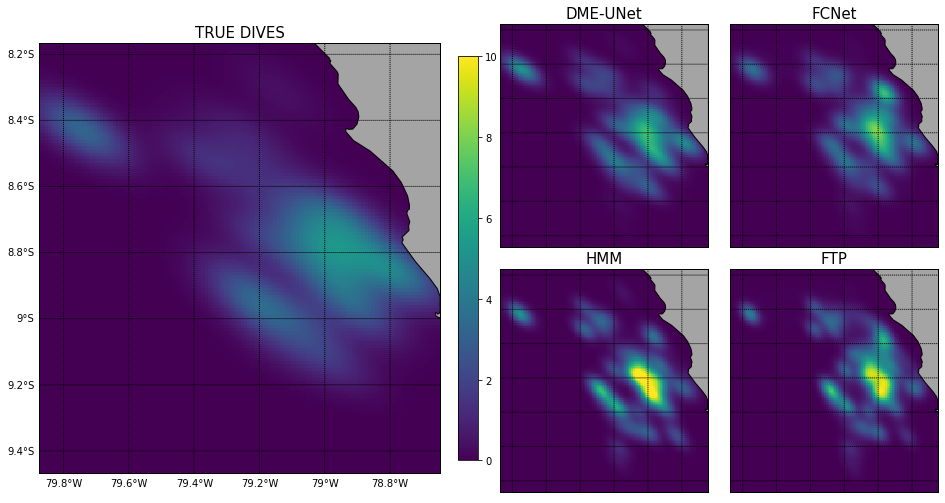

In [76]:
plt.figure(figsize=(12.5, 6.5))
gs = gridspec.GridSpec(2, 4)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.1) 

ax1 = plt.subplot(gs[0, 2])
my_kde_map(xx, yy, f_unet, 10, axis = False)
# for axis in ['top','bottom','left','right']:
#     ax1.spines[axis].set_linewidth(3)
#     ax1.spines[axis].set_color(dicolour['red'])
    
plt.title('DME-UNet',fontsize= 15)

ax2 = plt.subplot(gs[0, 3])
my_kde_map(xx, yy, f_fcn, 10, axis = False)
# for axis in ['top','bottom','left','right']:
#     ax2.spines[axis].set_linewidth(3)
#     ax2.spines[axis].set_color(dicolour['blue'])
plt.title('FCNet',fontsize= 15)

ax3 = plt.subplot(gs[1, 2])
my_kde_map(xx, yy, f_hmm, 10, axis = False)
# for axis in ['top','bottom','left','right']:
#     ax3.spines[axis].set_linewidth(3)
#     ax3.spines[axis].set_color(dicolour['orange'])
plt.title('HMM',fontsize= 15)

ax4 = plt.subplot(gs[1, 3])
my_kde_map(xx, yy, f_ftp, 10, axis = False)
# for axis in ['top','bottom','left','right']:
#     ax4.spines[axis].set_linewidth(3)
#     ax4.spines[axis].set_color(dicolour['green'])
plt.title('FTP',fontsize= 15)

ax5 = plt.subplot(gs[:2,:2])
my_kde_map(xx, yy, f_dive, 10, axis = True)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('TRUE DIVES',fontsize= 15)

# ax6 = plt.subplot(gs[2:,:2])
# m = my_map(unet.lon, unet.lat, 0.1, unet.dive,
#            '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_guanape.nc')
# plt.annotate("\uf015", xy=m(-78.966, -8.566), fontproperties=fp, fontsize = 20)


# ax7 = plt.subplot(gs[2,2:])

# pos1 = ax7.get_position() # get the original position 
# pos2 = [pos1.x0+0.12, pos1.y0+0.05,  pos1.width / 2.0, pos1.height / 2.0] 
# ax7.set_position(pos2) # set a new

# dist = [ np.sqrt( 1/2 * np.sum( (np.sqrt(f) - np.sqrt(f_dive))**2))  for f in [f_unet, f_fcn, f_hmm, f_ftp]]
# barlist=plt.bar(['UNET', 'FCN', 'HMM', 'FTP'], dist)
# barlist[0].set_color(dicolour['red'])
# barlist[1].set_color(dicolour['blue'])
# barlist[2].set_color(dicolour['orange'])
# barlist[3].set_color(dicolour['green'])
# plt.title('Hellinger Distance of Distribution Maps')


# ax8 = plt.subplot(gs[3,2:])
# plt.plot(fcn_roc[0], fcn_roc[1], label = 'fcn', c = dicolour['blue'])
# plt.plot(unet_roc[0], unet_roc[1], label = 'unet', c = dicolour['red'])
# plt.plot(hmm_roc[0], hmm_roc[1], label = 'hmm', c = dicolour['orange'])
# plt.plot(ftp_roc[0], ftp_roc[1], label = 'ftp', c = dicolour['green'])
# plt.plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
# plt.xlabel('False Positive', fontsize= 12)
# plt.ylabel('True Positive', fontsize= 12)
# # plt.legend(bbox_to_anchor=(1,1), frameon=False)
# ax = plt.gca()
# ax.set_aspect('equal')

In [24]:
def loss(x, y, weight):
    x[x < 1e-10] = 1e-10
    x[x > 1-1e-10] = 1-1e-10
    return np.mean(-(weight*y*np.log(x) + (1-y)*np.log(1-x)))

In [25]:
loss(ftp.prediction, ftp.dive, weight = 5)

/home/amdroy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/amdroy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.5190570722884615

In [26]:
#G1107_49_SV_T2

In [27]:
dist

[15.061935609306174, 25.025368707663585, 29.610396339823186, 32.21933999494305]

In [28]:
dist[2]/dist[0]

1.9659091041079804

# Error Samples

In [29]:
trip = unet_matrix.trip.unique()[0]

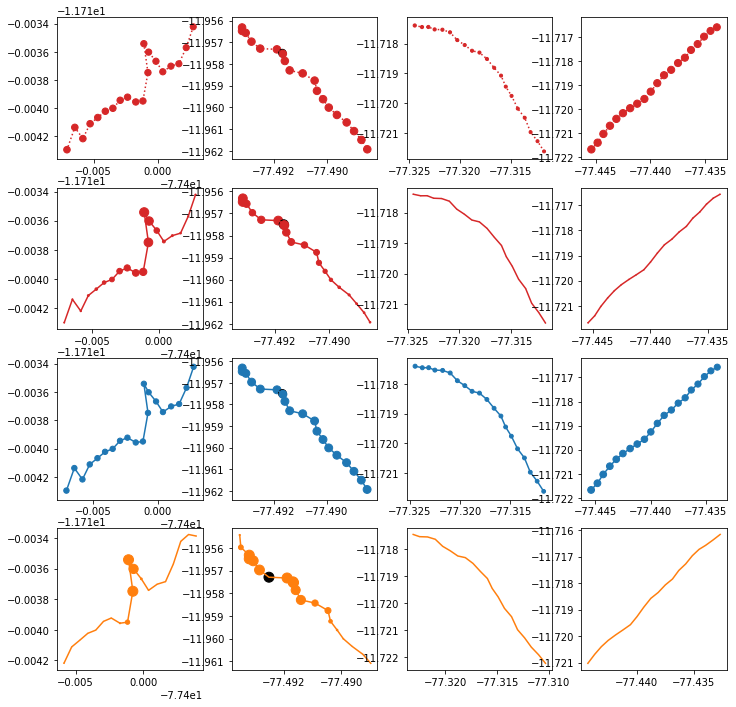

In [30]:
IDX = np.random.choice(range(1000), 4, replace = False)

a=1
b=5
c=9
d=13

plt.figure(figsize = (12, 12))
for i in IDX:
    
    plt.subplot(4,4, a)
    data = unet_lonlat[unet_lonlat.trip == trip]
    col = np.array([dicolour['red'] if d == 0 else 'black' for d in data.dive])
    plt.plot(data.lon[i-10:i+10], data.lat[i-10:i+10], c = dicolour['red'], linestyle = ':')
    plt.scatter(data.lon[i-10:i+10], data.lat[i-10:i+10],
                s = 100*data.prediction[i-10:i+10], c = col[i-10:i+10])
    a+=1
    
    plt.subplot(4,4, b)
    data = unet_matrixlonlat[unet_matrixlonlat.trip == trip]
    col = np.array([dicolour['red'] if d == 0 else 'black' for d in data.dive])
    plt.plot(data.lon[i-10:i+10], data.lat[i-10:i+10], c = dicolour['red'], linestyle = '-')
    plt.scatter(data.lon[i-10:i+10], data.lat[i-10:i+10],
                s = 100*data.prediction[i-10:i+10], c = col[i-10:i+10])
    b+=1
    
    plt.subplot(4,4, c)
    data = fcn_lonlat[fcn_lonlat.trip == trip]
    col = np.array([dicolour['blue'] if d == 0 else 'black' for d in data.dive])
    plt.plot(data.lon[i-10:i+10], data.lat[i-10:i+10], c = dicolour['blue'])
    plt.scatter(data.lon[i-10:i+10], data.lat[i-10:i+10],
                s = 100*data.prediction[i-10:i+10], c = col[i-10:i+10])
    c+=1
    
    plt.subplot(4,4, d)
    data_ = SV_hmm_5s[SV_hmm_5s.ID == trip]
    col = np.array([dicolour['orange'] if d == 0 else 'black' for d in data.dive])
    plt.plot(data_.x[i-10:i+10], data_.y[i-10:i+10], c = dicolour['orange'])
    plt.scatter(data_.x[i-10:i+10], data_.y[i-10:i+10],
                s = 100*data_.prediction[i-10:i+10], c = col[i-10:i+10])
    d+=1
    
#     print(sum(data.dive!=data_.dive))

In [31]:
fcn_lonlat

,trip,datetime,lon,lat,gaps,dive,step_speed,step_direction,lon_std,lat_std,step_speed_std,step_direction_cos,step_direction_sin,prediction
0,P1108_6_SV_T2,2008-11-25 21:03:25,-77.264393,-11.770143,0.0,0,15.618553,-4.458985,1.691276,0.797684,0.752478,0.996973,-0.077745,0.5
1,P1108_6_SV_T2,2008-11-25 21:03:30,-77.264937,-11.769742,0.0,0,14.841292,-22.123529,1.683857,0.802135,0.713763,0.926374,-0.376605,0.5
2,P1108_6_SV_T2,2008-11-25 21:03:35,-77.265407,-11.769267,0.0,0,14.722446,8.933298,1.677448,0.807408,0.707844,0.987870,0.155285,0.5
3,P1108_6_SV_T2,2008-11-25 21:03:40,-77.266028,-11.768765,0.0,0,17.552105,-6.364142,1.668979,0.812980,0.848787,0.993837,-0.110847,0.5
4,P1108_6_SV_T2,2008-11-25 21:03:45,-77.266380,-11.767972,0.0,0,19.248972,26.964911,1.664179,0.821782,0.933307,0.891284,0.453445,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,P1113_41_SV_T2,2013-11-22 17:10:34,-77.258640,-11.770770,0.0,0,12.046558,15.284482,1.761302,1.408835,0.522997,0.964629,0.263612,0.5
9656,P1113_41_SV_T2,2013-11-22 17:10:39,-77.258160,-11.771020,0.0,0,11.849651,-10.913241,1.767025,1.401383,0.514449,0.981915,-0.189322,0.5
9657,P1113_41_SV_T2,2013-11-22 17:10:44,-77.257600,-11.771280,0.0,0,13.507810,-2.640832,1.773702,1.393634,0.586437,0.998938,-0.046075,0.5
9658,P1113_41_SV_T2,2013-11-22 17:10:49,-77.257000,-11.771500,0.0,0,13.963680,-4.839963,1.780857,1.387077,0.606228,0.996434,-0.084373,0.5


In [32]:
SV_hmm_5s

,ID,step,angle,datetime,dive,gaps,x,y,prediction
0,P1108_6_SV_T2,0.070138,NaN,2008-11-25 21:03:15,0,0.0,-77.263737,-11.771312,0.036165
1,P1108_6_SV_T2,0.077739,0.078093,2008-11-25 21:03:20,0,0.0,-77.264025,-11.770745,0.000796
2,P1108_6_SV_T2,0.074049,0.386378,2008-11-25 21:03:25,0,0.0,-77.264393,-11.770143,0.000198
3,P1108_6_SV_T2,0.073383,-0.155789,2008-11-25 21:03:30,0,0.0,-77.264937,-11.769742,0.000016
4,P1108_6_SV_T2,0.087550,0.111016,2008-11-25 21:03:35,0,0.0,-77.265407,-11.769267,0.000031
...,...,...,...,...,...,...,...,...,...
9681,P1113_41_SV_T2,0.059176,0.189992,2013-11-22 17:10:34,0,0.0,-77.258640,-11.770770,0.000601
9682,P1113_41_SV_T2,0.067473,0.045914,2013-11-22 17:10:39,0,0.0,-77.258160,-11.771020,0.000495
9683,P1113_41_SV_T2,0.069777,0.084095,2013-11-22 17:10:44,0,0.0,-77.257600,-11.771280,0.000543
9684,P1113_41_SV_T2,0.073299,0.096801,2013-11-22 17:10:49,0,0.0,-77.257000,-11.771500,0.002754


In [33]:
SV_fcn_5s

,trip,datetime,lon,lat,gaps,dive,step_speed,step_direction,lon_std,lat_std,step_speed_std,step_direction_cos,step_direction_sin,prediction
0,P1108_6_SV_T2,2008-11-25 21:03:25,-77.264393,-11.770143,0.0,0,15.618553,-4.458985,1.691276,0.797684,0.752478,0.996973,-0.077745,0.5
1,P1108_6_SV_T2,2008-11-25 21:03:30,-77.264937,-11.769742,0.0,0,14.841292,-22.123529,1.683857,0.802135,0.713763,0.926374,-0.376605,0.5
2,P1108_6_SV_T2,2008-11-25 21:03:35,-77.265407,-11.769267,0.0,0,14.722446,8.933298,1.677448,0.807408,0.707844,0.987870,0.155285,0.5
3,P1108_6_SV_T2,2008-11-25 21:03:40,-77.266028,-11.768765,0.0,0,17.552105,-6.364142,1.668979,0.812980,0.848787,0.993837,-0.110847,0.5
4,P1108_6_SV_T2,2008-11-25 21:03:45,-77.266380,-11.767972,0.0,0,19.248972,26.964911,1.664179,0.821782,0.933307,0.891284,0.453445,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,P1113_41_SV_T2,2013-11-22 17:10:34,-77.258640,-11.770770,0.0,0,12.046558,15.284482,1.761302,1.408835,0.522997,0.964629,0.263612,0.5
9656,P1113_41_SV_T2,2013-11-22 17:10:39,-77.258160,-11.771020,0.0,0,11.849651,-10.913241,1.767025,1.401383,0.514449,0.981915,-0.189322,0.5
9657,P1113_41_SV_T2,2013-11-22 17:10:44,-77.257600,-11.771280,0.0,0,13.507810,-2.640832,1.773702,1.393634,0.586437,0.998938,-0.046075,0.5
9658,P1113_41_SV_T2,2013-11-22 17:10:49,-77.257000,-11.771500,0.0,0,13.963680,-4.839963,1.780857,1.387077,0.606228,0.996434,-0.084373,0.5


## Table

In [34]:
def loss(x, y):
    x[x < 1e-10] = 1e-10
    x[x > 1-1e-10] = 1-1e-10
    return np.mean(-(y*np.log(x) + (1-y)*np.log(1-x)))

In [35]:
res = pd.read_csv('./../results/SV_unet_matrixlonlatcov_30s.csv')
(FP, TP) = roc(res, opt='all')
-np.trapz(TP, FP)

0.8710484431392769

Text(0.5, 1.0, '0.8838709677419355')

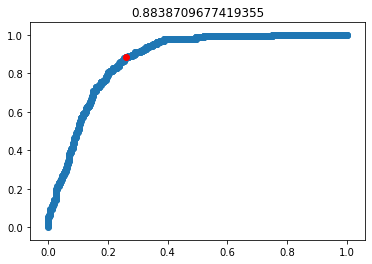

In [36]:
i = np.argmin(abs(TP - FP - 1))

plt.scatter(FP, TP)
plt.scatter(FP[i], TP[i], c = 'red')
plt.title(TP[i])

In [37]:
1-FP[i]

0.7400972897845726

In [38]:
loss(res.prediction, res.dive)

/home/amdroy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/amdroy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.8263510055152611

In [39]:
filename = './../results/LB_fcn_lonlatcov_30s.pickle'

infile = open(filename,'rb')
data = pickle.load(infile)
infile.close()

In [40]:
# convergence_data = [global_loss_train, global_loss_validation, global_loss_test]
data

[[0.9407907351851463,
  0.8560968811313311,
  0.8453006818890572,
  0.8437569613258044,
  0.8438590516646703],
 [0.8635706901550293,
  0.7992088437080384,
  0.785005259513855,
  0.7842078924179077,
  0.7886253237724304],
 0.8605440081272028]

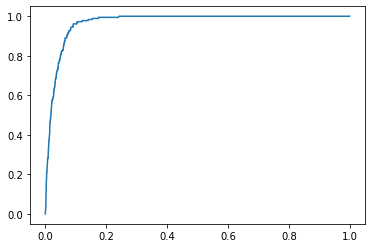

In [41]:
plt.plot(SV_unet_5s_roc[0], SV_unet_5s_roc[1])

In [42]:
# TRUE NEGATIVE
1-SV_unet_5s_roc[0][350]

0.9082181664732567

In [43]:
# TRUE POSITIVE
SV_unet_5s_roc[1][350]

0.9558011049723757